In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
from keras import models
from keras import layers
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Activation, Flatten, Dropout
network = models.Sequential()
network.add(Conv2D(filters=32, kernel_size=3, input_shape=(1,28*28,1), activation='relu', padding='same'))
network.add(Conv2D(filters=32, kernel_size=3, input_shape=(1,28*28,1), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=2, data_format='channels_first'))
network.add(Dropout(0.3))
network.add(Flatten())
network.add(Dense(128, activation='relu'))
network.add(Dense(10, activation='softmax'))

In [5]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 784, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 784, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 392, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 392, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
fix_train_images = train_images.reshape((60000, 28,28,1)).astype('float32') / 255
fix_test_images = test_images.reshape((10000,28,28,1)).astype('float32') / 255

In [8]:
from keras.utils import to_categorical

fix_train_labels = to_categorical(train_labels)
fix_test_labels = to_categorical(test_labels)

In [9]:
from keras.callbacks import *
# learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=2)

In [10]:
result = network.fit(
    fix_train_images,
    fix_train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(fix_test_images, fix_test_labels),
    callbacks = [early_stopping])

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1753 - accuracy: 0.9446 - val_loss: 0.0739 - val_accuracy: 0.9759
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0413 - val_accuracy: 0.9876
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0396 - val_accuracy: 0.9876
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0282 - val_accuracy: 0.9910
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0302 - val_accuracy: 0.9902
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0332 - val_accuracy: 0.9910
Epoch 

In [11]:
test_loss, test_acc = network.evaluate(fix_test_images, fix_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0400 - accuracy: 0.9914
test_loss: 0.04004558548331261
test_acc: 0.9914000034332275


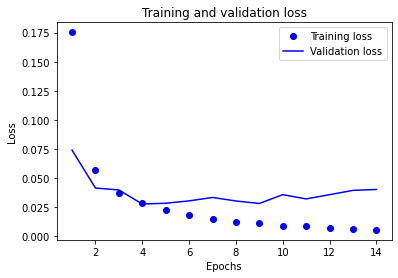

In [12]:
history_dict = result.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

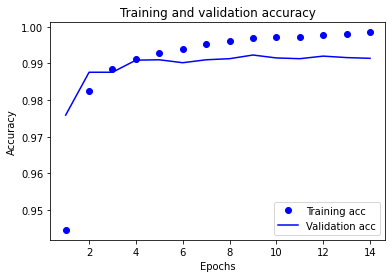

In [13]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()